# Prediction Model for Computing Insurance Premiums

## 1. Defining the Question

---



> To develop a model which will predict insurance premiums that assists insurance companies manage risk and ensure financial stability.



### a) Specifying the Data Analytic Question

> There are several challenges that insurance companies face when determining insurance premiums which can be a complex and time-consuming process. 


> **Problem Statement:** 
The goal of this project is to build a predictive model that can accurately estimate insurance premiums based on a variety of input features.   

### b) Defining the Metric for Success

The project will be considered a success if the developed predictive model is able to explain 80% of the variation of the target variable and have a Mean Absolute Error (MAE) of less than 5%
.

### c) Understanding the context 


According to the International Monetary Fund (IMF) working paper titled "Insurance Premiums: Determinants and Policy Implications," there are several challenges that insurance companies face when determining insurance premiums. Insurance companies must assess the risk of an insurance event occurring for each policyholder, taking into account a wide range of factors such as the policyholder's age, gender, medical history, and the type and cost of coverage. This can be a complex and time-consuming process.

### d) Recording the Experimental Design

1.Data Collection: Gather data on the variables to be included in the model. These includes variables such as age, gender, medical history, and the type and cost of coverage which are relevant to the insurance premiums.

2.Clean and preprocess the data: The data will be cleaned and preprocessed to ensure that it is in a usable form. This will involve tasks such as removing missing or invalid data, scaling the variables, and encoding categorical variables.

3.Split the data into training and test sets: The data will be split into a training set and a test set. The training set will be used to fit the linear regression model, while the test set will be used to evaluate the model's performance.

4.Fit the linear regression model: The data will be fit to a linear regression model to the training data by estimating the values of the coefficients for each predictor variable. Various software packages to fit the model, such as R or Python's scikit-learn library can be used.

5.Evaluate the model's performance: The test set will be used to evaluate the model's performance by comparing the predicted insurance premiums to the actual premiums. There are several metrics that you can use to assess the model's performance, such as mean squared error and R-squared.

6.Use the model to make predictions: After fitting and evaluating the model, it will be used to make predictions about the insurance premiums for new customers, based on their values for the predictor variables.

7.Conclusions and Recommendations

### e) Data Understanding 

The data set to be used https://www.kaggle.com/datasets/noordeen/insurance-premium-prediction comprises of 1338 rows and 7 columns. This includes 4 numerical and 3 cotegorical features which will be useful in selecting the target and predictor variables in this analysis. 

| Dataset Features | 
|:------|
|i. age - This is the age of an individual in years|
|iii. bmi - This is the body mass index of an individual |
|iv. children - This indicates the number of dependents covered by the health insurance|
|v. smoker - This describes whether an individual is a smoker or non-smoker (yes=smoker and no=non-smoker)|
|vi. region - This describes the beneficiary's residential area in the USA |
|vii. expenses - This is the individual's medical costs billed by health insurance 
 



## 2. Reading the Data

In [74]:
# loading the required libraries

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import norm
import statistics
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [75]:
# Loading the Data from the source i.e. csv

insurance_data = pd.read_csv('Insurance Premium dataset.csv')
insurance_data

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95




## 3. Checking the Data

In [76]:
# Determining the no. of records in our dataset

insurance_data.shape

(1338, 7)

The data set contains 1338 rows and 7 columns.

In [77]:
# Previewing the top of our dataset

insurance_data.head(10)

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
5,31,female,25.7,0,no,southeast,3756.62
6,46,female,33.4,1,no,southeast,8240.59
7,37,female,27.7,3,no,northwest,7281.51
8,37,male,29.8,2,no,northeast,6406.41
9,60,female,25.8,0,no,northwest,28923.14


In [78]:
# Previewing the bottom of our dataset

insurance_data.tail(10)

,age,sex,bmi,children,smoker,region,expenses
1328,23,female,24.2,2,no,northeast,22395.74
1329,52,male,38.6,2,no,southwest,10325.21
1330,57,female,25.7,2,no,southeast,12629.17
1331,23,female,33.4,0,no,southwest,10795.94
1332,52,female,44.7,3,no,southwest,11411.69
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [79]:
# Checking whether each column has an appropriate datatype 

insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


It can be noted that the data set does not contain any missing values. Additionally, the data type for each of the features is appropriate. 

In [80]:
# Check for duplicated rows

insurance_data.duplicated().any()

True

The data contains duplicated values which will be cleaned in the next few steps. 

In [81]:
# Check the summary statistics

insurance_data.describe(include = "all")

,age,sex,bmi,children,smoker,region,expenses
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.665471,1.094918,NaN,NaN,13270.422414
std,14.049960,NaN,6.098382,1.205493,NaN,NaN,12110.011240
min,18.000000,NaN,16.000000,0.000000,NaN,NaN,1121.870000
25%,27.000000,NaN,26.300000,0.000000,NaN,NaN,4740.287500
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.030000
75%,51.000000,NaN,34.700000,2.000000,NaN,NaN,16639.915000


Based off the above, we observe the following:
>a. The mean age in the data set is 39 while the standard deviation is 14 years.

>b. The mean bmi in the data set is 30.70 while the standard deviation is 6.10.

>c. The mean number of children in the data set is 2 while the standard deviation is 2 children.

>d. The mean insurance expense in the data set is 13,270.42 while the standard deviation is 12,110.01.

The data also includes categorical data where the majority sex is **male** with a frequency of 676. Moreover, the group contains a high number of **non-smokers** at 1064 individuals while most individuals are from the **southeast region** at 364. 

    

## 4. External Data Source Validation

The Kaiser Family Foundation (KFF) is a nonprofit organization that focuses on domestic health concerns and the U.S.'s position in international health policy. KFF creates and manages its own journalism, communications, and policy analysis initiatives, occasionally in collaboration with large news outlets. KFF works as a neutral resource for the public, the media, the health policy community, and policymakers by providing information, analysis, and journalism.

In it's report titled "Employer Health Benefits Survey" KFF established annual premiums for employer-sponsored family health coverage reaching USD 21,342. For single coverage, the typical deductible for covered employees in a plan with a general annual deductible is USD 1,644.

To verify the above, this is confirmed by plotting a histogram below.

<AxesSubplot:ylabel='Frequency'>

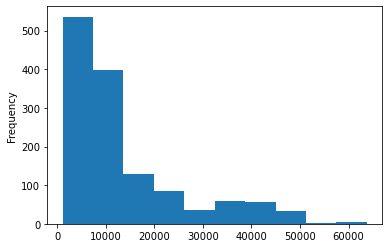

In [82]:
insurance_data['expenses'].plot(kind = "hist")


From the graph, the minimum contribution is USD 1,121 which is not far off from USD 1,644 as per teh finding in the report. Aditionally, it can be noted that most insurance premium cost between USD 5000 TO 25,000. 

This data set is fit for use in the development of the prediction model. 

## 5. Tidying the Dataset

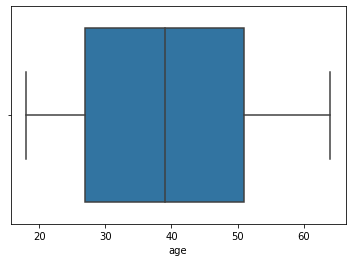

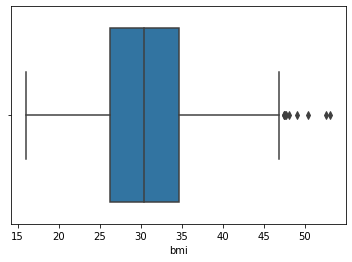

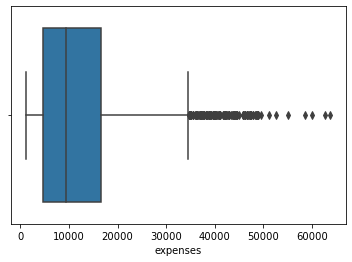

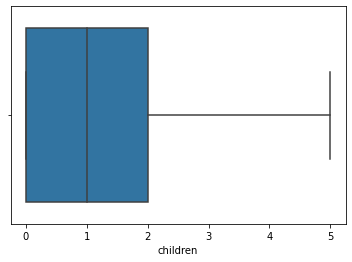

In [83]:
# Checking for Outliers

numeric_data = ['age','bmi','expenses','children']

for col in numeric_data:
    sns.boxplot(x = insurance_data[col])
    plt.show()

From the box plots above, we note that there are no outliers in the age and children predictor variables. However, bmi and expenses contain several outliers which will be investigated and sorted accordingly.   

In [84]:
# Identifying the Duplicates

duplicated_value = insurance_data[insurance_data.duplicated(keep = False)]
duplicated_value

,age,sex,bmi,children,smoker,region,expenses
195,19,male,30.6,0,no,northwest,1639.56
581,19,male,30.6,0,no,northwest,1639.56


In [85]:
# Drop duplicated row
insurance_data.drop_duplicates(inplace = True)

In [86]:
# Confirm that duplicated row has been deleted
insurance_data.shape

(1337, 7)

Looks okay now, we have dropped our duplicated row and are set for Exploratory data analysis
Hurray!💯 Yes and we are very happy!

## 6. Exploratory Data Analysis

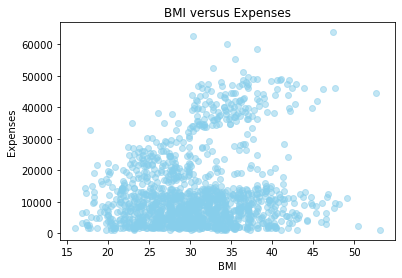

In [95]:
import matplotlib.pyplot as plt

# Create a scatter plot of BMI versus expenses
plt.scatter(insurance_data['bmi'], insurance_data['expenses'], color='skyblue',alpha=0.5)
plt.xlabel('BMI')
plt.ylabel('Expenses')
plt.title('BMI versus Expenses')
plt.show()


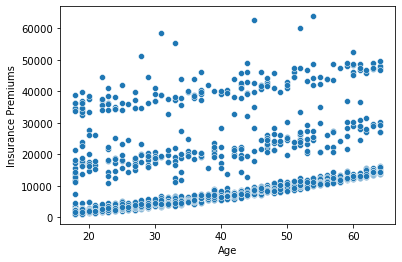

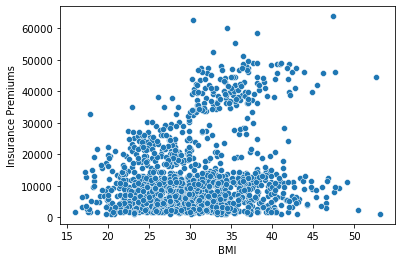

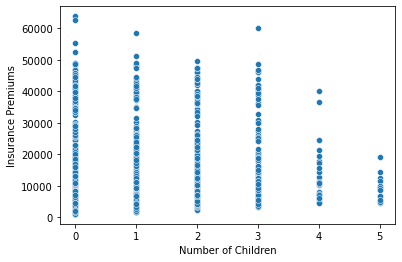

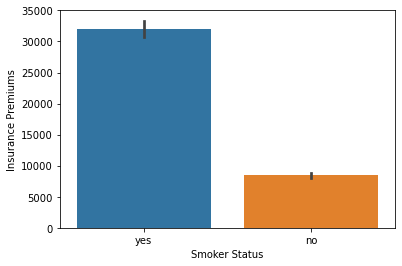

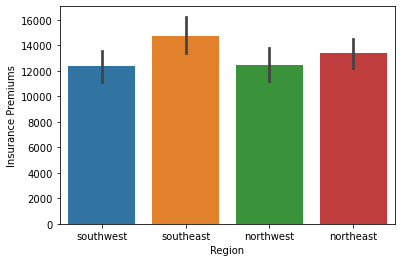

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

# Relationship between age and insurance premiums
sns.scatterplot(x='age', y='expenses', data=insurance_data)
plt.xlabel('Age')
plt.ylabel('Insurance Premiums')
plt.show()

# Relationship between BMI and insurance premiums
sns.scatterplot(x='bmi', y='expenses', data=insurance_data)
plt.xlabel('BMI')
plt.ylabel('Insurance Premiums')
plt.show()

# Relationship between number of children and insurance premiums
sns.scatterplot(x='children', y='expenses', data=insurance_data)
plt.xlabel('Number of Children')
plt.ylabel('Insurance Premiums')
plt.show()

# Relationship between smoker status and insurance premiums
sns.barplot(x='smoker', y='expenses', data=insurance_data)
plt.xlabel('Smoker Status')
plt.ylabel('Insurance Premiums')
plt.show()

# Relationship between region and insurance premiums
sns.barplot(x='region', y='expenses', data=insurance_data)
plt.xlabel('Region')
plt.ylabel('Insurance Premiums')
plt.show()


In [88]:
# Ploting the bivariate summaries and recording our observations
# 

In [89]:
# Data Reduction
#

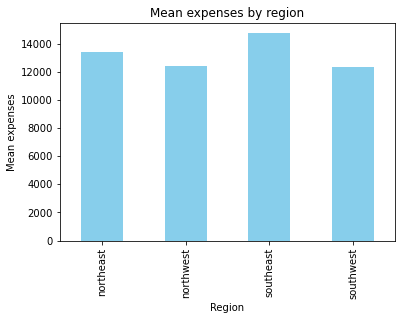

In [90]:
import matplotlib.pyplot as plt

# Group the data by region and calculate the mean expenses for each region
grouped_data = insurance_data.groupby('region')['expenses'].mean()

# Plot the mean expenses for each region
grouped_data.plot(kind='bar', color='skyblue')
plt.xlabel('Region')
plt.ylabel('Mean expenses')
plt.title('Mean expenses by region')
plt.show()


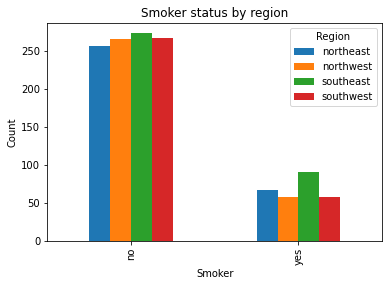

In [91]:
import pandas as pd

# Create a cross-tabulation table of smoker status and region
smoker_region_table = pd.crosstab(insurance_data['smoker'], insurance_data['region'])

# Plot the cross-tabulation table as a bar chart
smoker_region_table.plot(kind='bar', stacked=False)
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.title('Smoker status by region')
plt.legend(title='Region')


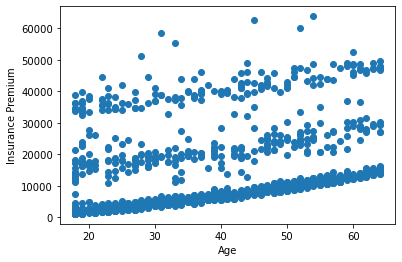

In [92]:
import pandas as pd
import matplotlib.pyplot as plt

# load the dataset
##insurance_data = pd.read_csv("insurance.csv")

# plot the relationship between age and insurance premium
plt.scatter(insurance_data["age"], insurance_data["expenses"])
plt.xlabel("Age")
plt.ylabel("Insurance Premium")
plt.show()


<AxesSubplot:xlabel='sex', ylabel='expenses'>

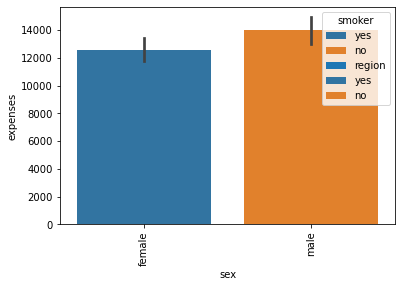

In [93]:
import pandas as pd
import seaborn as sns

# Load the insurance dataset
#insurance_data = pd.read_csv("insurance.csv")

# Explore relationship between age and smoker status
sns.countplot(x='age', hue='smoker', data=insurance_data)

# Explore relationship between region and expenses
insurance_data.groupby(['region', 'expenses'])['region'].count().plot.bar()

# Explore relationship between smoker status and region
sns.countplot(x='region', hue='smoker', data=insurance_data)

# Explore relationship between sex and insurance premium
sns.barplot(x='sex', y='expenses', data=insurance_data)


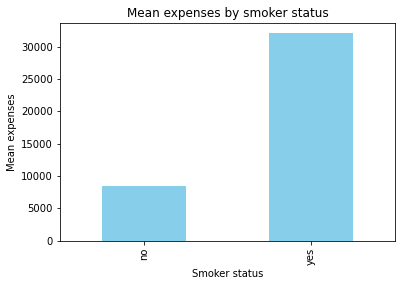

In [94]:
import matplotlib.pyplot as plt

# Group the data by smoker status and calculate the mean expenses for each smoker status
grouped_data = insurance_data.groupby('smoker')['expenses'].mean()

# Plot the mean expenses for each smoker status
grouped_data.plot(kind='bar', color='skyblue')
plt.xlabel('Smoker status')
plt.ylabel('Mean expenses')
plt.title('Mean expenses by smoker status')
plt.show()


## 7. Implementing the Solution

In [18]:
# Implementing the Solution
# 

## 8. Challenging the solution

> The easy solution is nice because it is, well, easy, but you should never allow those results to hold the day. You should always be thinking of ways to challenge the results, especially if those results comport with your prior expectation.






In [19]:
# Reviewing the Solution 
#

## 9. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?

### b). Do we need other data to answer our question?

### c). Did we have the right question?